In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("train.csv")

***1 Data Cleaning***

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sms     5574 non-null   object
 1   label   5574 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [4]:
df.shape

(5574, 2)

In [5]:
df.head()

,sms,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [6]:
df.rename(columns={'sms':'mails','label': 'target'},inplace = True)

In [7]:
df.head()

,mails,target
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


**checking null values**

In [8]:
li = df['target'].isnull()

In [9]:
li.value_counts()

target
False    5574
Name: count, dtype: int64

In [10]:
df.isnull().sum()

mails     0
target    0
dtype: int64

In [11]:
#Checkng duplicate values

In [12]:
df.duplicated().sum()

403

In [13]:
#Remove duplicates
df = df.drop_duplicates(keep='first')

In [14]:
df.shape

(5171, 2)

***2 EDA(exporatory data analsis)***

In [15]:
df['target'].value_counts()

target
0    4518
1     653
Name: count, dtype: int64

In [16]:
#1.(0->ham)
#2.(1->spam)

In [17]:
df.head()

,mails,target
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


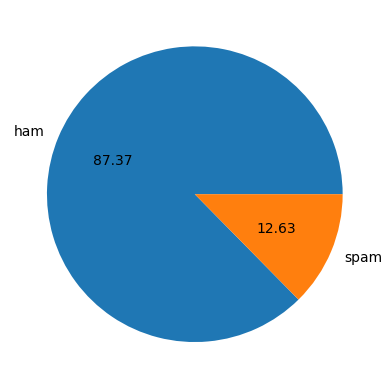

In [18]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [19]:
import nltk

In [20]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bcc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
df['num_characters'] = df['mails'].apply(len)

In [22]:
df.head()

,mails,target,num_characters
0,"Go until jurong point, crazy.. Available only ...",0,112
1,Ok lar... Joking wif u oni...\n,0,30
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156
3,U dun say so early hor... U c already then say...,0,50
4,"Nah I don't think he goes to usf, he lives aro...",0,62


In [23]:
df['num_words'] = df['mails'].apply(lambda x:len(nltk.word_tokenize(x)))

In [24]:
df.head()

,mails,target,num_characters,num_words
0,"Go until jurong point, crazy.. Available only ...",0,112,24
1,Ok lar... Joking wif u oni...\n,0,30,8
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156,37
3,U dun say so early hor... U c already then say...,0,50,13
4,"Nah I don't think he goes to usf, he lives aro...",0,62,15


In [25]:
df['num_sentences'] = df['mails'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [26]:
df.head()

,mails,target,num_characters,num_words,num_sentences
0,"Go until jurong point, crazy.. Available only ...",0,112,24,2
1,Ok lar... Joking wif u oni...\n,0,30,8,2
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156,37,2
3,U dun say so early hor... U c already then say...,0,50,13,1
4,"Nah I don't think he goes to usf, he lives aro...",0,62,15,1


In [27]:
df.describe()

,target,num_characters,num_words,num_sentences
count,5171.000000,5171.000000,5171.000000,5171.000000
mean,0.126281,80.332431,18.606459,1.973893
std,0.332198,58.333188,13.388223,1.458880
min,0.000000,3.000000,1.000000,1.000000
25%,0.000000,37.000000,9.000000,1.000000
50%,0.000000,62.000000,15.000000,1.000000
75%,0.000000,120.000000,26.500000,2.000000
max,1.000000,911.000000,220.000000,38.000000


In [28]:
df[df['target'] == 0]

,mails,target,num_characters,num_words,num_sentences
0,"Go until jurong point, crazy.. Available only ...",0,112,24,2
1,Ok lar... Joking wif u oni...\n,0,30,8,2
3,U dun say so early hor... U c already then say...,0,50,13,1
4,"Nah I don't think he goes to usf, he lives aro...",0,62,15,1
6,Even my brother is not like to speak with me. ...,0,78,18,2
...,...,...,...,...,...
5567,Huh y lei...\n,0,13,4,1
5570,Will ü b going to esplanade fr home?\n,0,37,9,1
5571,"Pity, * was in mood for that. So...any other s...",0,58,15,2
5572,The guy did some bitching but I acted like i'd...,0,126,27,1


In [29]:
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4518.000000,4518.000000,4518.000000
mean,71.894865,17.282205,1.827579
std,56.590179,13.572746,1.394245
min,3.000000,1.000000,1.000000
25%,35.000000,8.000000,1.000000
50%,54.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,911.000000,220.000000,38.000000


In [30]:
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,138.710567,27.768760,2.986217
std,29.818940,6.987509,1.494815
min,14.000000,2.000000,1.000000
25%,133.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,158.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [31]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

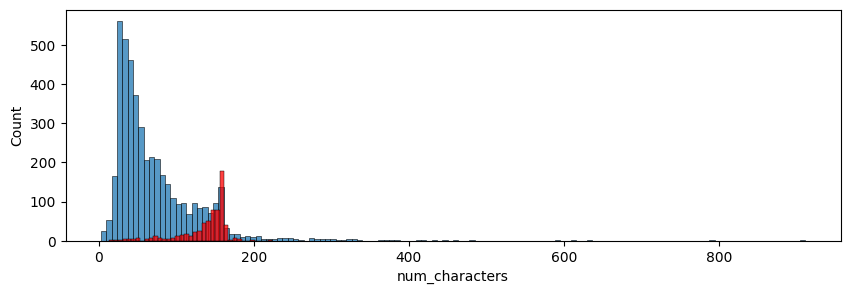

In [32]:
plt.figure(figsize=(10,3))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

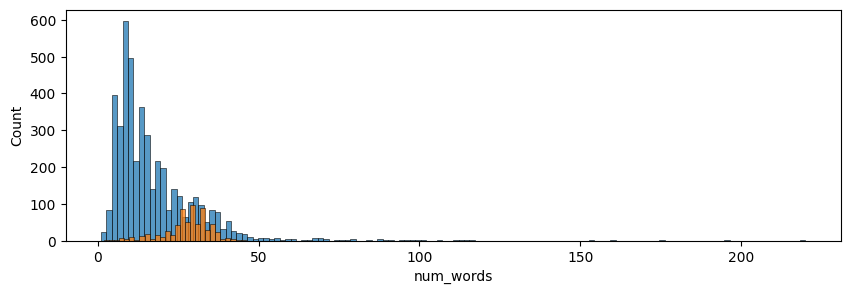

In [33]:
plt.figure(figsize=(10,3))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'])

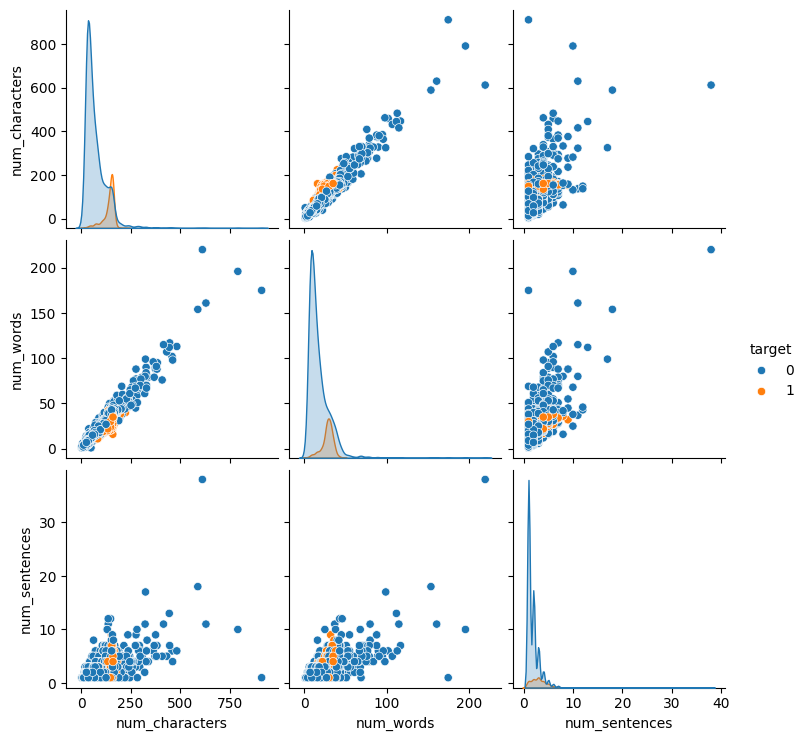

In [34]:
sns.pairplot(df,hue='target')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5171 entries, 0 to 5573
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   mails           5171 non-null   object
 1   target          5171 non-null   int64 
 2   num_characters  5171 non-null   int64 
 3   num_words       5171 non-null   int64 
 4   num_sentences   5171 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 242.4+ KB


In [36]:
df.head(3)

,mails,target,num_characters,num_words,num_sentences
0,"Go until jurong point, crazy.. Available only ...",0,112,24,2
1,Ok lar... Joking wif u oni...\n,0,30,8,2
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156,37,2


<Axes: >

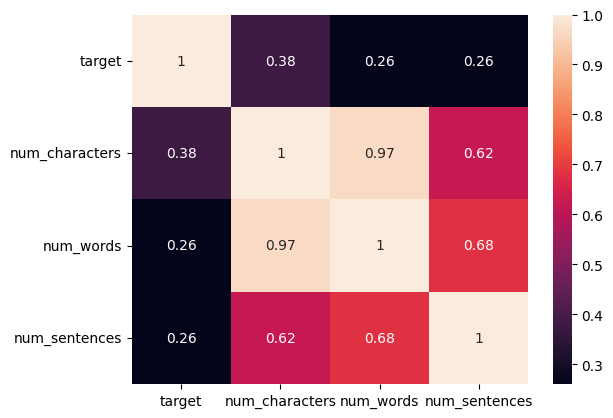

In [37]:
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(),annot=True)

***3 Data Preprocessing***

In [38]:
#Transformations

In [39]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [40]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bcc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [41]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
#it is return only meaningful word...
ps.stem('loving')

'love'

In [42]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    #remove special characters
    y = []
    for i in text:
         if i.isalnum():#->if alphanumercial character is availble the return true else return false
            y.append(i)

    text = y[:]
    y.clear()

    stop_words_set = set(stopwords.words('english'))
    for i in text:
         if i.lower() not in stop_words_set and i not in string.punctuation:
             y.append(i)

    text = y[:]
    y.clear()
    for i in text:
         y.append(ps.stem(i))

    return " ".join(y) 

In [43]:
transform_text("hlo How 23 40 amritses + _ - * paling ` ~ it is a playing  ")

'hlo 23 40 amrits pale play'

In [44]:
df['transformed_mails'] = df['mails'].apply(transform_text)

In [45]:
df.head()

,mails,target,num_characters,num_words,num_sentences,transformed_mails
0,"Go until jurong point, crazy.. Available only ...",0,112,24,2,go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...\n,0,30,8,2,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,U dun say so early hor... U c already then say...,0,50,13,1,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",0,62,15,1,nah think goe usf live around though


In [46]:
#------wordCloud working------------

In [47]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white') 

In [48]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_mails'].str.cat(sep=""))

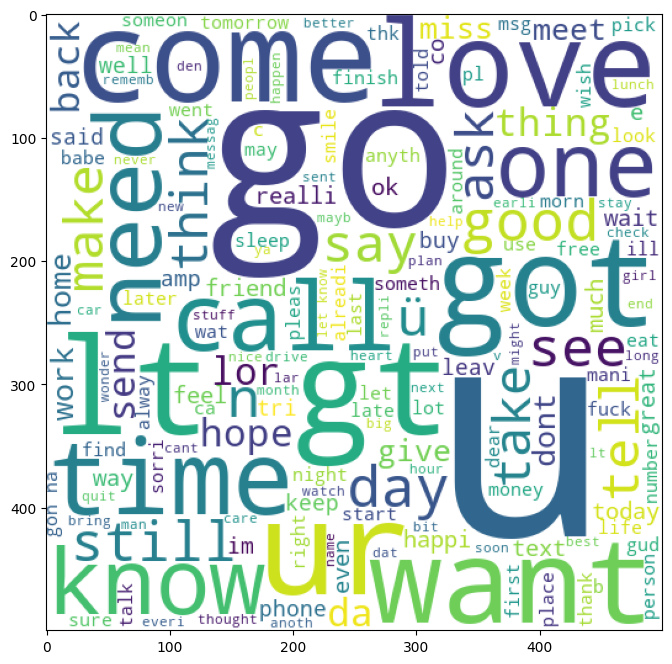

In [49]:
plt.figure(figsize=(12,8))
plt.imshow(ham_wc)

In [50]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_mails'].str.cat(sep=""))

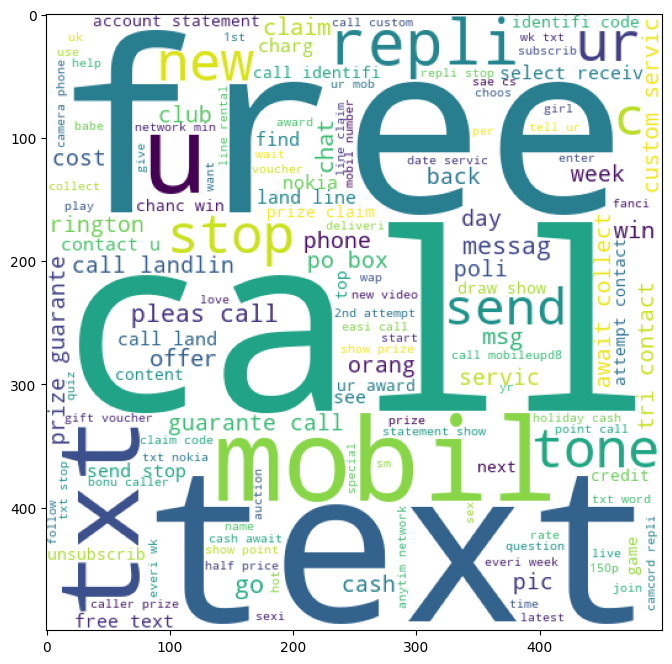

In [51]:
plt.figure(figsize = (12,8))
plt.imshow(spam_wc)

In [52]:
df.head()

,mails,target,num_characters,num_words,num_sentences,transformed_mails
0,"Go until jurong point, crazy.. Available only ...",0,112,24,2,go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...\n,0,30,8,2,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,U dun say so early hor... U c already then say...,0,50,13,1,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",0,62,15,1,nah think goe usf live around though


In [53]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_mails'].tolist():
    #print(msg)
    for word in msg.split():
        ham_corpus.append(word)

In [54]:
ham_corpus

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'way',
 'u',
 

<Axes: ylabel='0'>

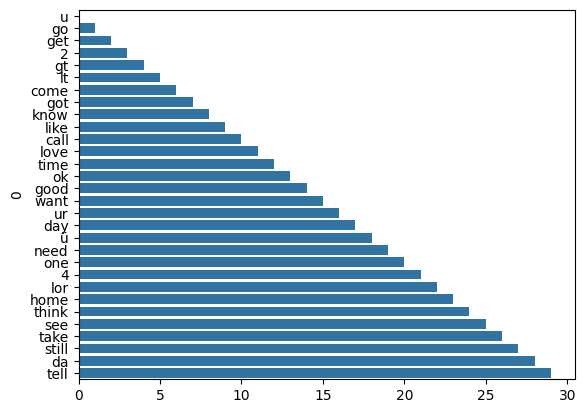

In [55]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0])

In [56]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_mails'].tolist():
    #print(msg)
    for word in msg.split():
        spam_corpus.append(word)

<Axes: ylabel='0'>

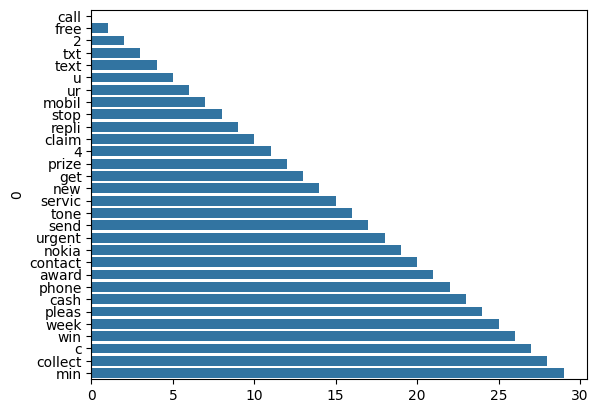

In [57]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0])

***Data Model Building***

In [58]:
#----------working-----------

In [59]:
df.head()

,mails,target,num_characters,num_words,num_sentences,transformed_mails
0,"Go until jurong point, crazy.. Available only ...",0,112,24,2,go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...\n,0,30,8,2,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,U dun say so early hor... U c already then say...,0,50,13,1,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",0,62,15,1,nah think goe usf live around though


In [60]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
#improve model accuracy and precision ways below here..
tfidf = TfidfVectorizer(max_features=3000)
#cv = CountVectorizer()

In [61]:
X = tfidf.fit_transform(df['transformed_mails']).toarray()

In [62]:
X.shape

(5171, 3000)

In [63]:
y = df['target'].values

In [64]:
y.dtype

dtype('int64')

In [65]:
#Model Train and Test

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [68]:
X_train.shape

(4136, 3000)

In [69]:
y_train.shape

(4136,)

In [70]:
#Models

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

from sklearn.metrics import confusion_matrix,accuracy_score,precision_score

In [72]:
#All models check one-by-one

In [73]:
lrc = LogisticRegression(solver="liblinear",penalty="l1")
svc = SVC(kernel="sigmoid",gamma=1.0)
dtc = DecisionTreeClassifier(max_depth=5)
knc = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bac = BaggingClassifier(n_estimators=50,random_state=2)
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [86]:
clfs = {'LG ':lrc,
        'SVM ':svc,
        'DT ':dtc,
        'KNN ':knc,
        'RFC ':rfc,
        'abc ':abc,
        'mnb ':mnb,
        'bnb ':bnb
       }

In [87]:
#This function find best classifier 

In [88]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test) 
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [89]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print("accuracy -> ",accuracy_score(y_test,y_pred1))
print("Confusion Matrix -> ",confusion_matrix(y_test,y_pred1))
print("precision_score -> ",precision_score(y_test,y_pred1))

accuracy ->  0.8647342995169082
Confusion Matrix ->  [[779 119]
 [ 21 116]]
precision_score ->  0.49361702127659574


In [90]:
mnb.fit(X_train,y_train)
y_pred1 = mnb.predict(X_test)
print("accuracy -> ",accuracy_score(y_test,y_pred1))
print("Confusion Matrix -> ",confusion_matrix(y_test,y_pred1))
print("precision_score -> ",precision_score(y_test,y_pred1))

accuracy ->  0.9758454106280193
Confusion Matrix ->  [[895   3]
 [ 22 115]]
precision_score ->  0.9745762711864406


In [91]:
bnb.fit(X_train,y_train)
y_pred1 = bnb.predict(X_test)
print("accuracy -> ",accuracy_score(y_test,y_pred1))
print("Confusion Matrix -> ",confusion_matrix(y_test,y_pred1))
print("precision_score -> ",precision_score(y_test,y_pred1))

accuracy ->  0.9845410628019323
Confusion Matrix ->  [[898   0]
 [ 16 121]]
precision_score ->  1.0


In [92]:
#This code access all the classifiers and snd into function one-by-one

In [93]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    cur_accuracy,cur_precision = train_classifier(clf,X_train,y_train,X_test,y_test)

    print("Name: ",name)
    print("Accuracy",cur_accuracy)
    print("Precision",cur_precision)

    accuracy_scores.append(cur_accuracy)
    precision_scores.append(cur_precision)

Name:  LG 
Accuracy 0.9536231884057971
Precision 0.908256880733945
Name:  SVM 
Accuracy 0.9768115942028985
Precision 0.9747899159663865
Name:  DT 
Accuracy 0.9314009661835749
Precision 0.8
Name:  KNN 
Accuracy 0.9082125603864735
Precision 1.0
Name:  RFC 
Accuracy 0.9739130434782609
Precision 0.9824561403508771
Name:  abc 
Accuracy 0.9671497584541063
Precision 0.9478260869565217
Name:  mnb 
Accuracy 0.9758454106280193
Precision 0.9745762711864406
Name:  bnb 
Accuracy 0.9845410628019323
Precision 1.0


In [82]:
#create new dataframe i

In [95]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy':accuracy_scores, 'Precision':precision_scores}).sort_values('Precision', ascending = False)

In [96]:
performance_df

,Algorithm,Accuracy,Precision
3,KNN,0.908213,1.000000
7,bnb,0.984541,1.000000
4,RFC,0.973913,0.982456
1,SVM,0.976812,0.974790
6,mnb,0.975845,0.974576
5,abc,0.967150,0.947826
0,LG,0.953623,0.908257
2,DT,0.931401,0.800000


In [97]:
#choose the model

In [98]:
import pickle 

In [99]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(bnb,open('model.pkl','wb'))